In [1]:
import numpy as np
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Строим ИКФ на основе методов Рунге-Кутты

Возьмём несколько схем семейства Рунге-Кутты и используем их коэффициенты b[i] и c[i] для того, чтобы построить ИКФ.

При этом c[i] будут определять положение узлов ИКФ, а b[i] - значения коэффициентов ИКФ (которые A[i]).

In [2]:
euler = {
    'name': 'Euler (1)',
    'A': [
        [0.0],
    ],
    'b': np.array([1])
}

In [3]:
pred_corr = {
    'name': 'Predictor-corrector (2)',
    'A': [
        [0.0, 0.0],
        [0.5, 0.5],
    ],
    'b': np.array([0.5, 0.5])
}

In [4]:
rk4 = {
    'name': 'Runge-Kutta (4)',
    'A': [
        [0.0, 0.0, 0.0, 0.],
        [0.5, 0.0, 0.0, 0.],
        [0.0, 0.5, 0.0, 0.],
        [0.0, 0.0, 1.0, 0.],
    ],
    'b': np.array([1, 2, 2, 1]) / 6
}

In [5]:
dp5 = {
    'name': 'Dormand-Prince (5)',
    'A': [
        [0, 0, 0, 0, 0, 0, 0],
        [1 / 5, 0, 0, 0, 0, 0, 0],
        [3 / 40, 9 / 40, 0, 0, 0, 0, 0],
        [44 / 45, -56 / 15, 32 / 9, 0, 0, 0, 0],
        [19372 / 6561, -25360 / 2187, 64448 / 6561, -212 / 729, 0, 0, 0],
        [9017 / 3168, -355 / 33, 46732 / 5247, 49 / 176, -5103 / 18656, 0, 0],
        [35 / 384, 0, 500 / 1113, 125 / 192, -2187 / 6784, 11 / 84, 0],
    ],
    'b': np.array([35 / 384, 0, 500 / 1113, 125 / 192, -2187 / 6784, 11 / 84, 0])
}

In [6]:
def func(x, k):
    return x**k

Проверим на мономах.

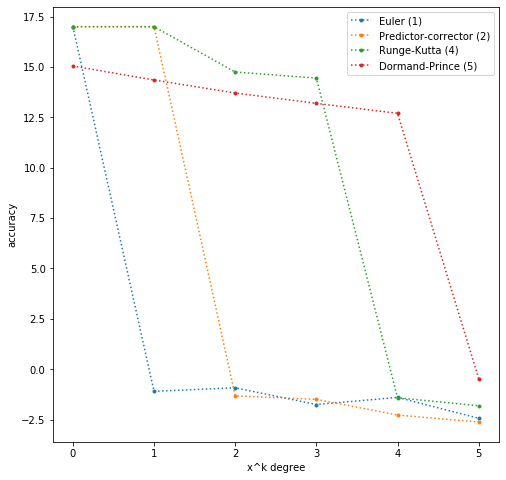

In [7]:
x0, x1 = -2, 3
degs = range(0, 6)

plt.figure(figsize=(8, 8))

for method in [euler, pred_corr, rk4, dp5]:
    c = np.sum(method['A'], axis=1)  # c - это построчная сумма матрицы А
    n = len(method['A'])
    xs = x0 + (x1-x0) * c  # коэффициенты вектора c определяют узлы ИКФ

    accs = []
    for deg in degs:
        fs = [func(x, deg) for x in xs]
        int_rk = method['b'] @ fs * (x1-x0)  # коэффициенты вектора b будут коэффициентами ИКФ
        
        int_ex = (func(x1, deg+1) - func(x0, deg+1)) / (deg+1)  # точное значение интеграла
        
        accs.append(-np.log10(np.clip(np.abs(int_rk - int_ex), 1e-17, np.inf)))
    plt.plot(degs, accs, '.:', label=method['name'])
plt.xlabel('x^k degree')
plt.ylabel('accuracy')
plt.legend();

Убеждаемся, что АСТ соответствующей ИКФ всегда на единицу меньше, чем порядок соответствующей схемы Рунге-Кутты (почему?).